# Chapter 1 - Clustering for dataset exploration

Unsupervised learning finds patterns in data (e.g. clustsering customers by their purchases), without a specific prediction task in mind (unlike supervised learning, where we find patterns for a prediction task)

Dimension reduction: compressing the data using, e.g. purchase patterns

Iris dataset:

- Samples are points in 4D space
- Dimension = no. of features (too high to visualise in this case - unsupervised learning gives insight)
- 3 species: setosa, versicolor, virginica (each having petal length, petal width, sepal length and sepal width features)
- Rows: samples, columns: features

k-means clustering:

- Find clusters of samples
- Need to specify $k$ (no. of clusters)

## Scatter plots

We can create a scatter plot to visualise how many clusters there are.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
points = pd.read_csv('./datasets/points.csv', index_col=0).values

In [3]:
xs = points[:, 0]
ys = points[:, 1]

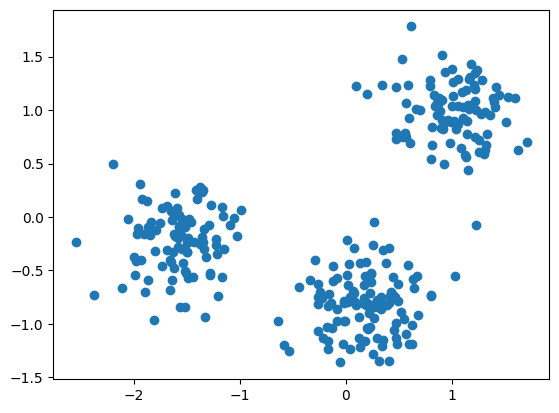

In [4]:
plt.scatter(xs, ys)

Here we can see 3 clusters.

## K-means model

Now, let's fit a KMeans model to find 3 clusters of the samples and fit to the `points` data.

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3)
model.fit(points)

KMeans(n_clusters=3)

In [7]:
new_points = pd.read_csv('./datasets/new_points.csv', index_col=0).values

In [8]:
# Determine the cluster labels of new_points (fit to the nearest centroid)
labels = model.predict(new_points)

In [9]:
labels

array([1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1,
       0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1], d

Next, we will inspect the clustering to make it easier to interpret.

In [10]:
xs = new_points[:, 0]
ys = new_points[:, 1]

In [11]:
# Get the coordinates of the centroids
centroids = model.cluster_centers_

In [12]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

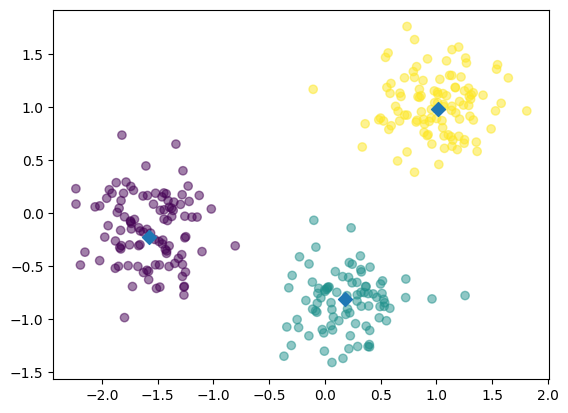

In [13]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

The clustering looks good. The nearest centroid to each new sample determines the cluster a particular data point belongs to.

Next, we will evaluate the quality of the clustering.

## Evaluating a clustering

As we are given the iris species, we can check the clustering aligns with the number of species. However, if we don't have the species to check against, we need to measure the quality of a clustering (informs the choice of how many clusters to look for).

A good clustering has tight clusters (samples in each cluster bunched together).

Inertia measures clustering quality: how spread out the clusters are (where lower is better). Inertia is the distance from each sample to centroid of its cluster.

K-means will attempt to minimize the inertia when choosing clusters.

In [14]:
samples = pd.read_csv('./datasets/seeds.csv', header=None).values

In [15]:
samples[:10]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ,
         1.    ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ,
         1.    ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ,
         1.    ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ,
         1.    ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ,
         1.    ],
       [14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ,
         1.    ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ,
         1.    ],
       [14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ,
         1.    ],
       [16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ,
         1.    ],
       [16.44  , 15.25  ,  0.888 ,  5.884 ,  3.505 ,  1.969 ,  5.533 ,
         1.    ]])

In [16]:
ks = range(1, 6)
inertias = []

# Fit a k-means model with a different number of clusters k
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

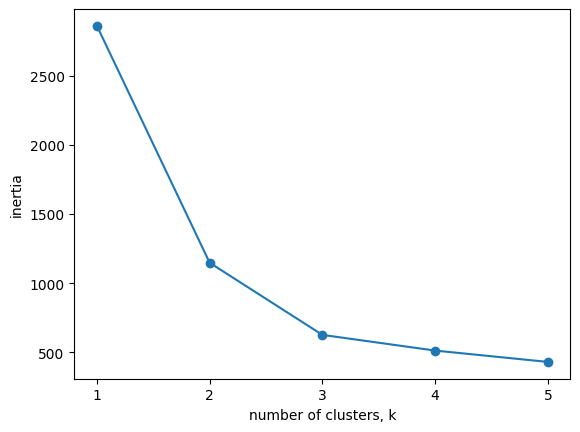

In [17]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the inertia plot the inertia decreases very slowly from 3 clusters to 4 (elbow), so 3 would be a good choice for this data.

Next, we will compare the clusters to the grain varieties using a cross-tabulation.

In [18]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [19]:
varieties = pd.read_csv('./datasets/varieties.csv', index_col=0).values.flatten()

In [20]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [21]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,70,5,0
1,0,1,60
2,0,64,10


We see from the cross-tabulation the varieties of grain separate really well into 3 clusters.

## Transforming features for better clusterings

Different features can have very different variances (i.e. spread of values). A feature can have more influence with a larger variance, hence we need to standardize the feature values to have mean 0 and variance (1) (unit variance).

We can use standardization (`StandardScaler`) as a preprocessing step in a pipeline to achieve this. Feature standardization can significantly improve the clustering.

Other examples include `MaxAbsScaler` and `Normalizer`.

First, we will standardize features from a fish dataset.

In [22]:
samples = pd.read_csv('./datasets/fish.csv', header=None)

In [23]:
samples = samples.iloc[:, 1:]

In [24]:
samples

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2
81,1250.0,52.0,56.0,59.7,17.9,11.7
82,1600.0,56.0,60.0,64.0,15.0,9.6
83,1550.0,56.0,60.0,64.0,15.0,9.6


In [25]:
species = pd.read_csv('./datasets/species.csv', index_col=0).values.flatten()

In [26]:
np.unique(species)

array(['Bream', 'Pike', 'Roach', 'Smelt'], dtype=object)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [28]:
scaler = StandardScaler() # uses fit() and transform()

In [29]:
kmeans = KMeans(n_clusters=4) # uses fit() and predict()

In [30]:
pipeline = make_pipeline(scaler, kmeans)

Next, we will use the pipeline to scale and cluster the fish by their measurements, then create a cross-tabulation to compare the cluster labels with the fish species.

In [31]:
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [32]:
labels = pipeline.predict(samples)

In [33]:
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,0,0,0,13
1,33,0,1,0
2,1,0,19,1
3,0,17,0,0


It looks like the fish data separates really well into 4 clusters.

Next, we will cluster companies using their daily stock price movements (difference between closing and opening prices for each trading day).

In [34]:
movements = pd.read_csv('./datasets/movements.csv')

In [35]:
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [36]:
movements.shape

(60, 964)

In [37]:
companies = movements.iloc[:, 0].values

In [38]:
np.unique(companies)

array(['3M', 'AIG', 'Amazon', 'American express', 'Apple',
       'Bank of America', 'Boeing', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Chevron', 'Cisco', 'Coca Cola',
       'Colgate-Palmolive', 'ConocoPhillips', 'Dell', 'DuPont de Nemours',
       'Exxon', 'Ford', 'General Electrics', 'GlaxoSmithKline',
       'Goldman Sachs', 'Google/Alphabet', 'HP', 'Home Depot', 'Honda',
       'IBM', 'Intel', 'JPMorgan Chase', 'Johnson & Johnson',
       'Kimberly-Clark', 'Lookheed Martin', 'MasterCard', 'McDonalds',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Philip Morris', 'Procter Gamble',
       'Royal Dutch Shell', 'SAP', 'Sanofi-Aventis', 'Schlumberger',
       'Sony', 'Symantec', 'Taiwan Semiconductor Manufacturing',
       'Texas instruments', 'Total', 'Toyota', 'Unilever',
       'Valero Energy', 'Wal-Mart', 'Walgreen', 'Wells Fargo', 'Xerox',
       'Yahoo'], dtype=object)

In [39]:
movements = movements.iloc[:, 1:].values

In [40]:
from sklearn.preprocessing import Normalizer

In [41]:
# Normalize stocks to rescale each sample/row (i.e. company's stock price)
# indepdendently of the other (not the same as StandardScaler!)
normalizer = Normalizer()

In [42]:
kmeans = KMeans(n_clusters=10)

In [43]:
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Now we have clustered companies by their daily stock price movements, we will inspect the cluster labels.

In [44]:
# Predict the cluster labels
labels = pipeline.predict(movements)

In [45]:
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [46]:
df.sort_values('labels').head(20)

,labels,companies
1,0,AIG
26,0,JPMorgan Chase
5,0,Bank of America
55,0,Wells Fargo
11,0,Cisco
18,0,Goldman Sachs
15,0,Ford
39,1,Pfizer
6,1,British American Tobacco
46,1,Sanofi-Aventis
